In [1]:
import numpy as np
import pandas as pd
import openpyxl

# 描述性统计

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 读取数据，转换类型
data=pd.read_excel('job_clean.xlsx')
data=data.iloc[:,1:]
data[['职位类型','工作经验','学历要求','最少实习天数','最少实习周期','工作城市','公司行业','公司规模']]=data[['职位类型','工作经验','学历要求','最少实习天数','最少实习周期','工作城市','公司行业','公司规模']].astype('category')
data = data[data['职位类型']=='数据分析师']

In [4]:
# 查看数据情况
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   职位类型    300 non-null    category
 1   职位名称    300 non-null    object  
 2   年薪下限    300 non-null    int64   
 3   年薪上限    300 non-null    int64   
 4   福利待遇    300 non-null    object  
 5   技能要求    300 non-null    object  
 6   工作经验    279 non-null    category
 7   学历要求    300 non-null    category
 8   最少实习天数  21 non-null     category
 9   最少实习周期  21 non-null     category
 10  工作城市    300 non-null    category
 11  工作地点    273 non-null    object  
 12  公司名称    300 non-null    object  
 13  公司行业    300 non-null    category
 14  公司规模    297 non-null    category
 15  招聘人职务   300 non-null    object  
dtypes: category(8), int64(2), object(6)
memory usage: 35.8+ KB


In [5]:
data.describe()

,年薪下限,年薪上限
count,3.000000e+02,3.000000e+02
mean,8.513683e+05,1.399607e+06
std,1.548597e+06,2.595155e+06
min,1.200000e+04,2.400000e+04
25%,6.000000e+04,8.400000e+04
50%,1.200000e+05,1.680000e+05
75%,1.008000e+06,1.560000e+06
max,1.080000e+07,1.620000e+07


In [6]:
# 处理绘图的中文和符号错误
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

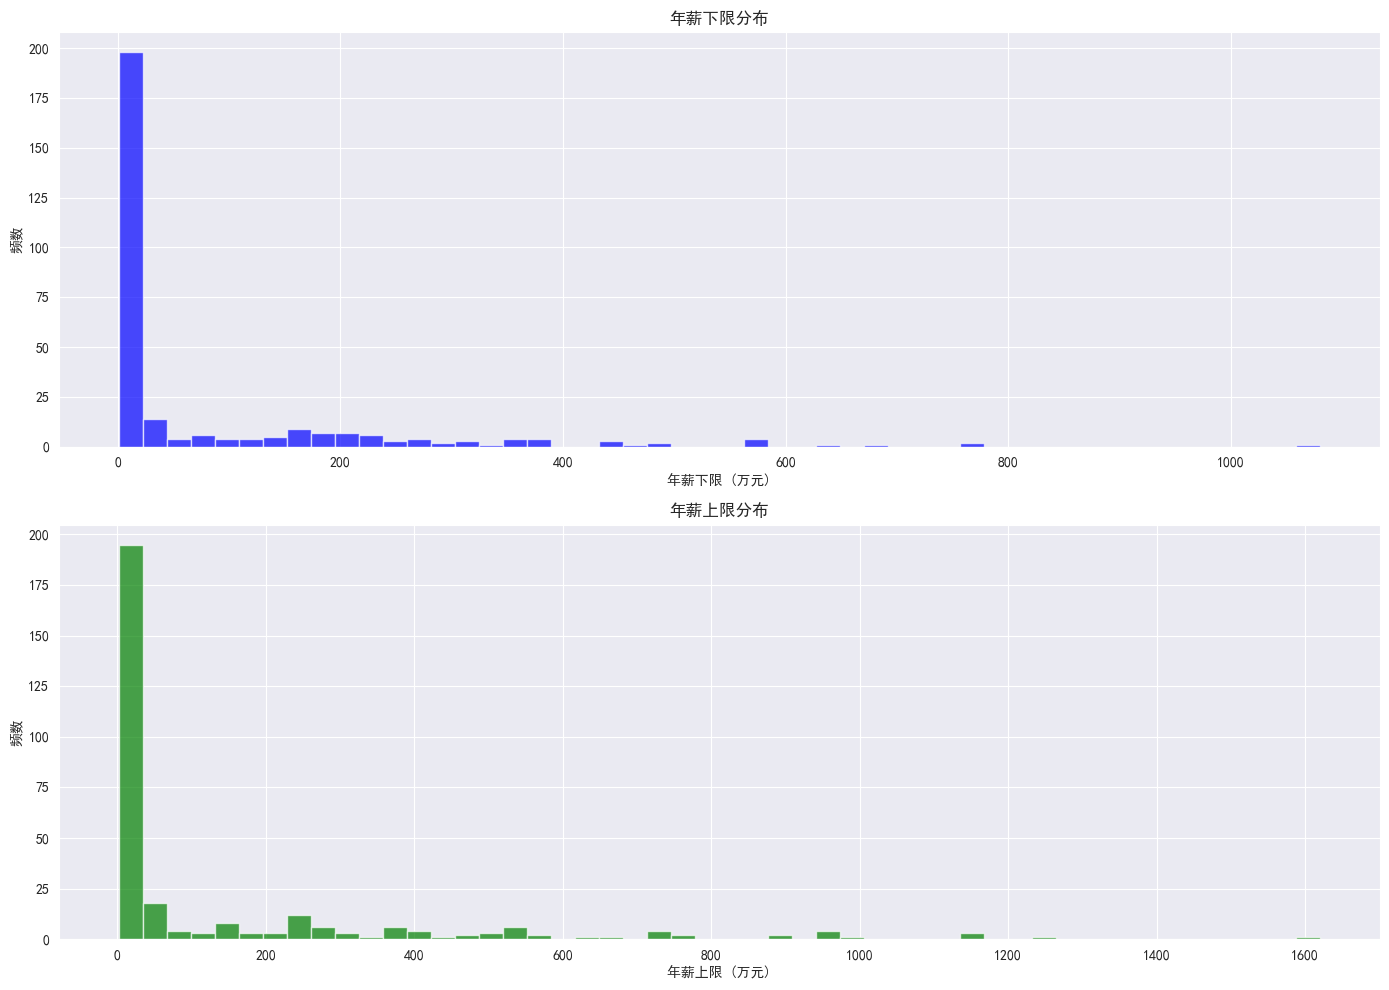

In [7]:
# 年薪分布情况
data['年薪下限_万'] = data['年薪下限'] / 10000
data['年薪上限_万'] = data['年薪上限'] / 10000

fig, axes = plt.subplots(nrows=2, figsize=(14, 10))

data['年薪下限_万'].hist(ax=axes[0], bins=50, color='blue', alpha=0.7)
axes[0].set_title('年薪下限分布')
axes[0].set_xlabel('年薪下限 (万元)')
axes[0].set_ylabel('频数')

data['年薪上限_万'].hist(ax=axes[1], bins=50, color='green', alpha=0.7)
axes[1].set_title('年薪上限分布')
axes[1].set_xlabel('年薪上限 (万元)')
axes[1].set_ylabel('频数')

plt.tight_layout()
plt.show()

In [8]:
data['学历要求'].value_counts().to_csv('./数据分析师文件/学历要求.csv')

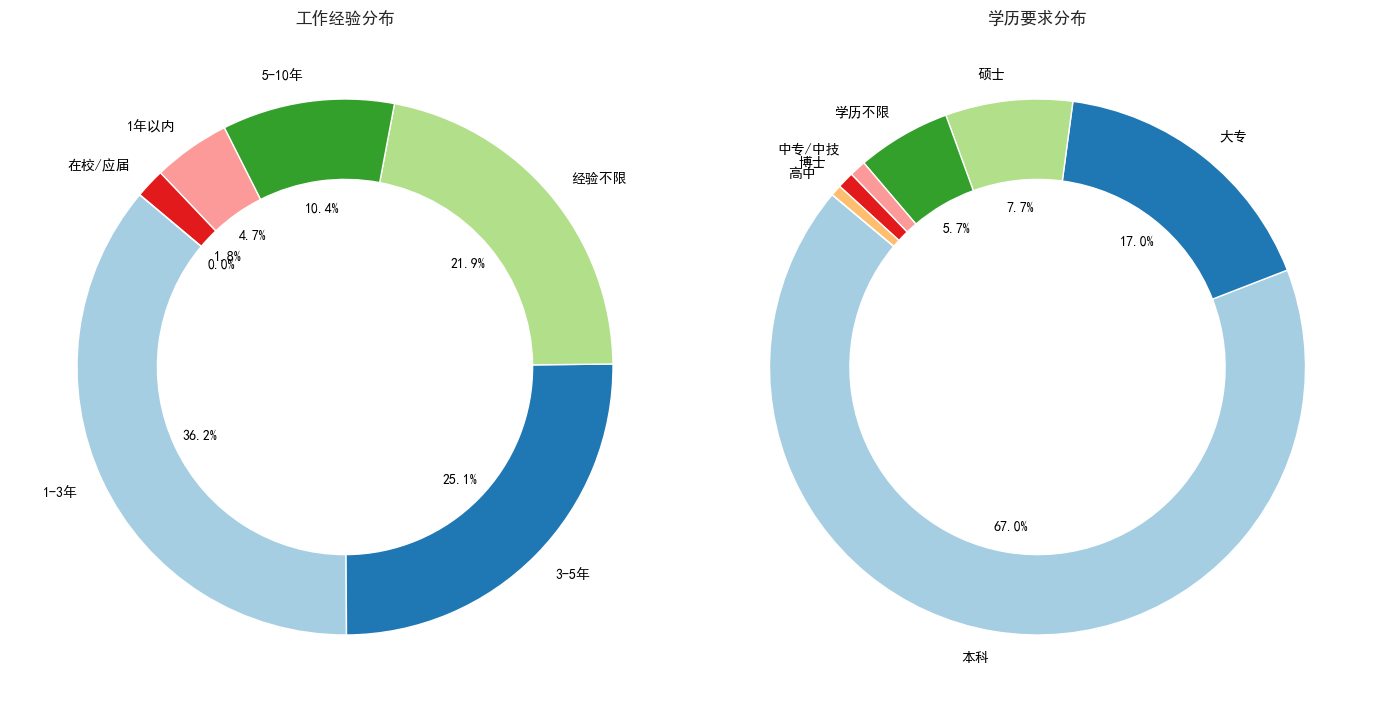

In [9]:
# 工作经验与学历要求占比情况
fig, axes = plt.subplots(ncols=2, figsize=(14, 7))

data['工作经验'].value_counts().plot(kind='pie', ax=axes[0], autopct=lambda p: f'{p:.1f}%', startangle=140, colors=plt.cm.Paired.colors, wedgeprops=dict(width=0.3), textprops=dict(color="black"))
axes[0].set_ylabel('')
axes[0].set_title('工作经验分布')

data['学历要求'].value_counts().plot(kind='pie', ax=axes[1], autopct=lambda p: f'{p:.1f}%' if p>1 else '', startangle=140, colors=plt.cm.Paired.colors, wedgeprops=dict(width=0.3), textprops=dict(color="black"))
axes[1].set_ylabel('')
axes[1].set_title('学历要求分布')

plt.tight_layout()
plt.show()

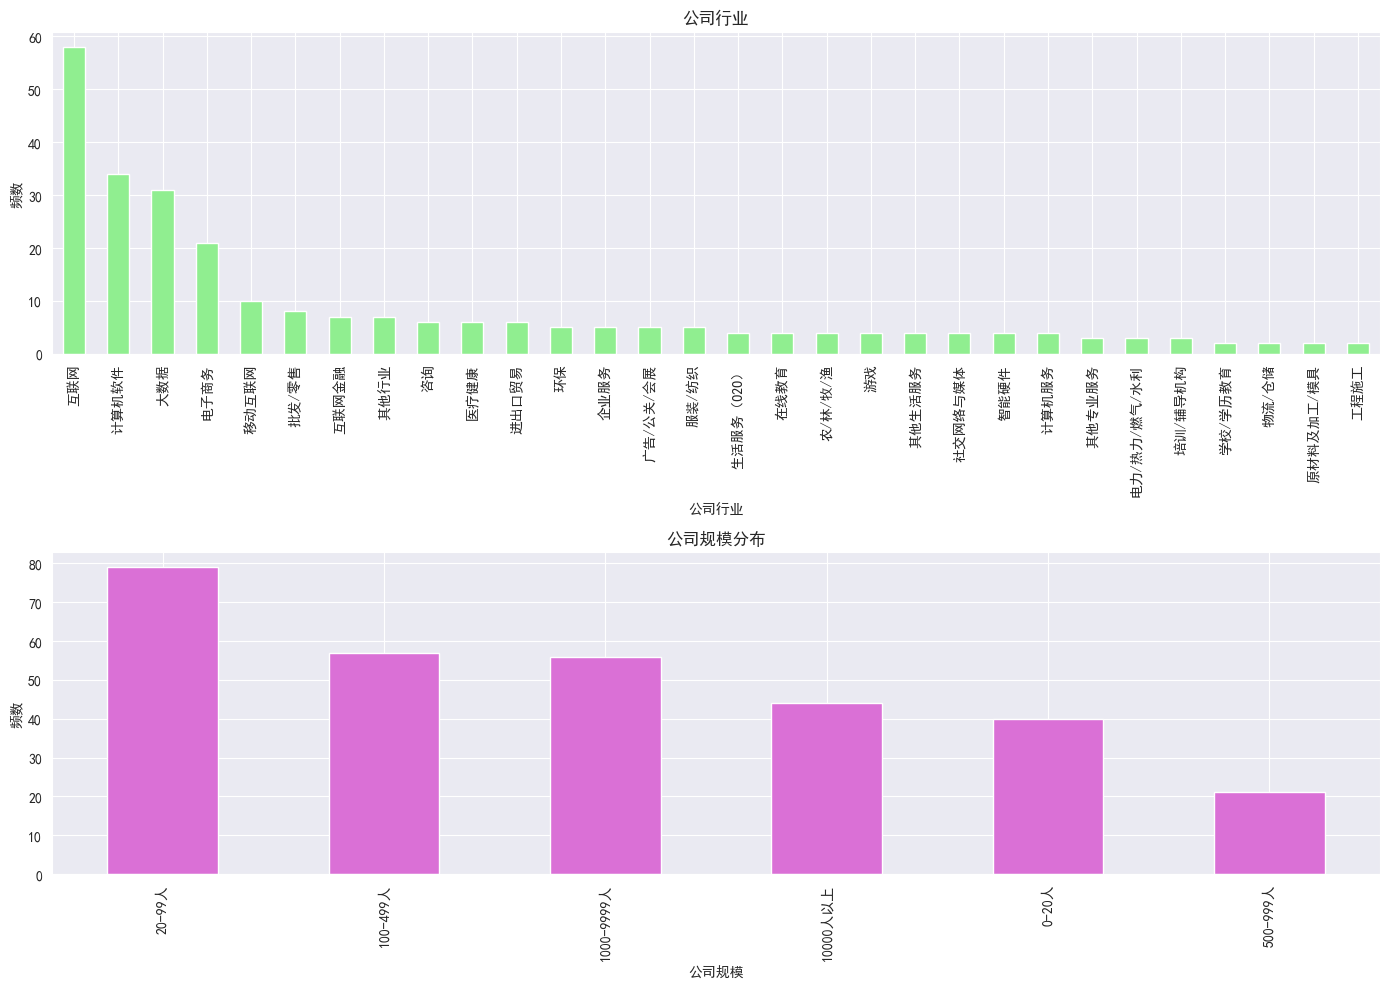

In [10]:
# 公司行业与公司规模占比情况
fig, axes = plt.subplots(nrows=2, figsize=(14, 10))

data['公司行业'].value_counts()[:30].plot(kind='bar', ax=axes[0], color='lightgreen')
axes[0].set_title('公司行业')
axes[0].set_ylabel('频数')

data['公司规模'].value_counts().plot(kind='bar', ax=axes[1], color='orchid')
axes[1].set_title('公司规模分布')
axes[1].set_ylabel('频数')

plt.tight_layout()
plt.show()

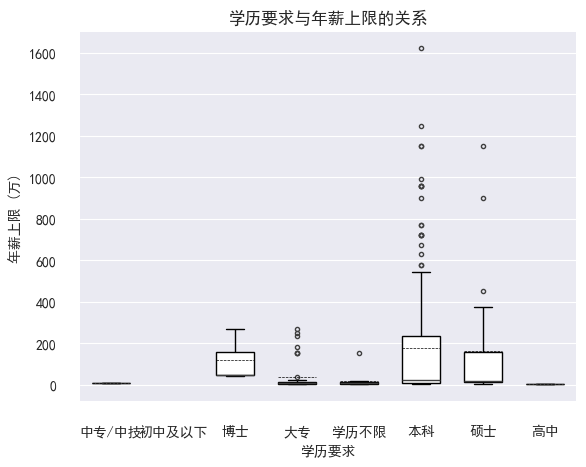

In [11]:
# 学历要求与年薪上限关系
sat_box = sns.boxplot(
    data=data,
    x='学历要求',
    y='年薪上限_万',
    width=0.6,
    fliersize=3,  # 设置离群点大小
    showmeans=True,  # 显示均值标记
    meanline=True,  # 显示均值线
    meanprops={"color": "black", "linewidth": 0.5},  # 设置均值线样式
    boxprops={"facecolor": "white", "edgecolor": "black"},  # 设置箱体样式
    whiskerprops={"color": "black"},  # 设置须子颜色
    capprops={"color": "black"}  # 设置帽顶颜色
)

# 添加网格线
sns.despine(offset=10, trim=True)

plt.title("学历要求与年薪上限的关系")
plt.ylabel("年薪上限 (万)")

# 显示图像
plt.show()

C:\Users\19693\AppData\Local\Temp\ipykernel_24204\4027307797.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


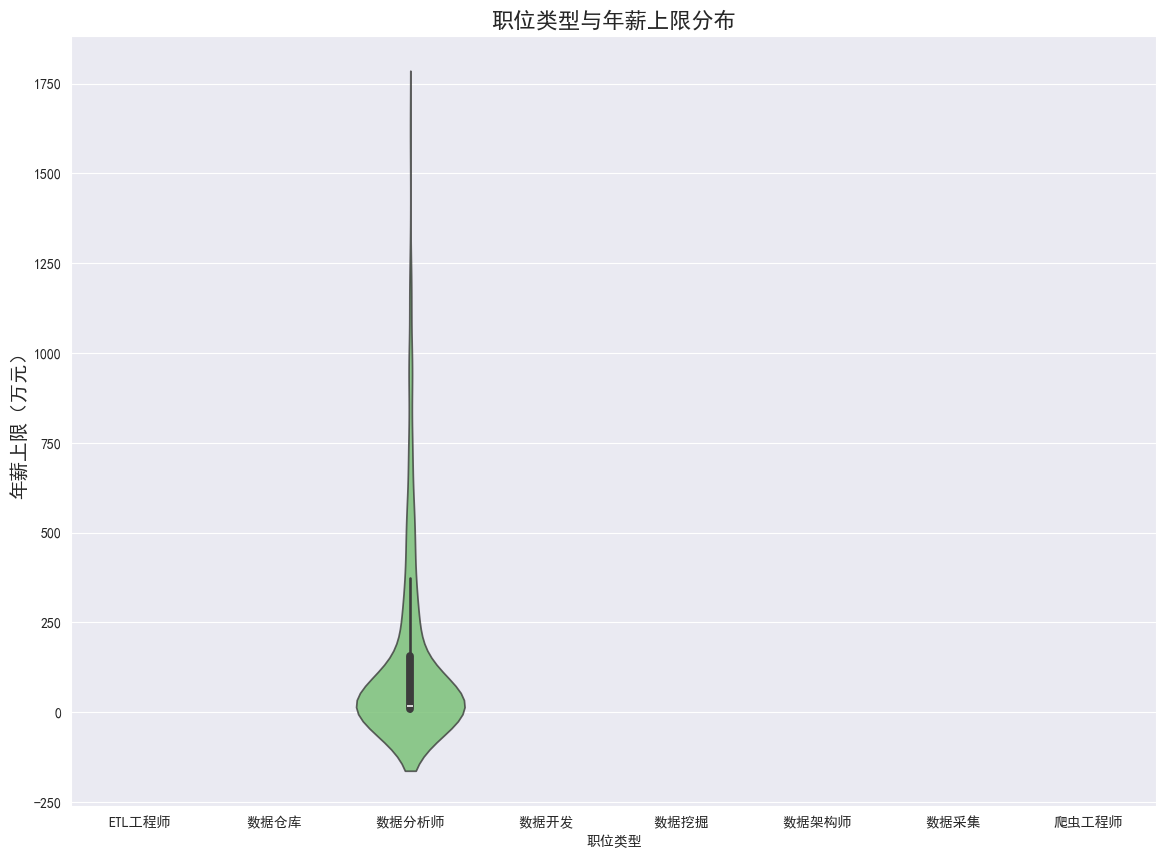

In [12]:
# 职位类型与年薪上限关系
fig, axes = plt.subplots(figsize=(14, 10))

sns.violinplot(
    data=data,
    x='职位类型',
    y='年薪上限_万',
    palette='muted',
    alpha=0.8,
)

axes.set_title('职位类型与年薪上限分布', fontsize=16)
axes.set_ylabel('年薪上限（万元）', fontsize=14)

# 显示图像
plt.show()


C:\Users\19693\AppData\Local\Temp\ipykernel_24204\3008563391.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  company_size_stats = data.groupby('公司规模')['年薪上限_万'].median().reset_index()


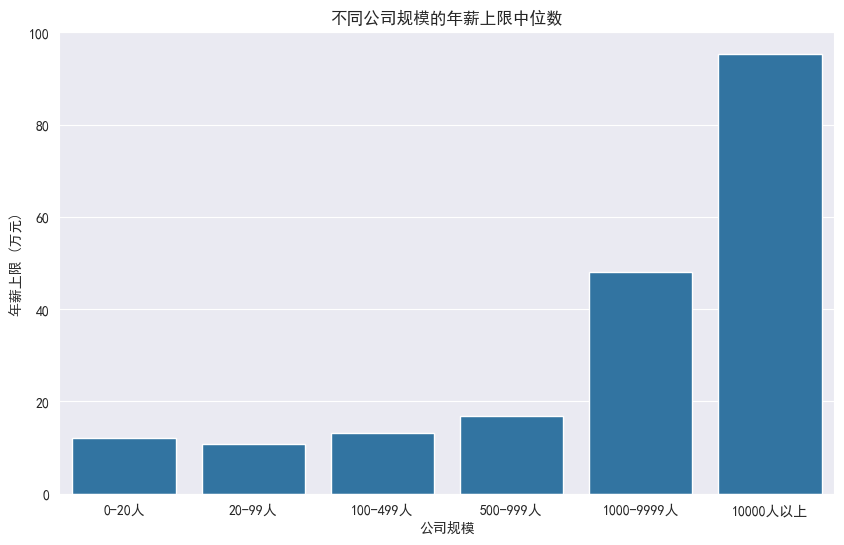

In [13]:
# 公司规模与年薪上限关系
company_size_stats = data.groupby('公司规模')['年薪上限_万'].median().reset_index()
custom_order = ['0-20人', '20-99人', '100-499人', '500-999人', '1000-9999人', '10000人以上']

company_size_stats['公司规模'] = pd.Categorical(company_size_stats['公司规模'], categories=custom_order, ordered=True)

company_size_stats = company_size_stats.sort_values(by='公司规模')

# 绘制条形图
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='公司规模', y='年薪上限_万', data=company_size_stats, ax=ax)
ax.set_title('不同公司规模的年薪上限中位数')
ax.set_xlabel('公司规模')
ax.set_ylabel('年薪上限 (万元)')

plt.show()

In [14]:
education_time = data[['工作经验','学历要求','年薪下限','年薪上限']]
education_time.to_csv('./数据分析师文件/学历经验与年薪关系.csv')

# education_time.loc[:,'平均年薪'] = (education_time['年薪上限']+education_time['年薪下限'])/2
# education_time[['工作经验','学历要求','平均年薪']].to_csv('./数据分析师文件/工作经验与学历与年薪关系.csv')

In [15]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

df = pd.read_excel('data2.xlsx')  

text = ' '.join(df['职位名称'].astype(str))  

from collections import Counter    
import re    
  
def count_words(text):       
    cleaned_text = re.sub(r'[^\w\s]', '', text.lower())    
    words = cleaned_text.split()     
    word_counts = Counter(words)    
    return word_counts  

word_freq = count_words(text)


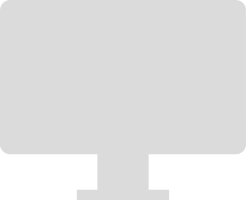

In [16]:
word_tuples = list(word_freq.items())  
from pyecharts.charts import WordCloud  
from pyecharts import options as opts 

wordcloud = (  
    WordCloud(init_opts=opts.InitOpts(height='900px',width='1600px'))  
    .add("", word_tuples, word_size_range=[5, 40], mask_image='电脑.png')
    .set_global_opts(title_opts=opts.TitleOpts(title="职位名称词云图"))  
)  

wordcloud.render("职位名称词云图")
wordcloud.render_notebook()

In [17]:
# 绘制技能词云图
all_skill_list=[]
for skill in df['技能要求']:
    all_skill_list.append(','.join(re.split(r'[,\s;/]+', skill)))
all_skill_list2 = [i.split(',') for i in all_skill_list if i!=''] 
all_skill_list3 = [item for sublist in all_skill_list2 for item in sublist if item!='']
all_skill_dict={}
for i in all_skill_list3:
    if i not in all_skill_dict:
        all_skill_dict[i]=1
    else:
        all_skill_dict[i]+=1

all_skill_tuple=all_skill_dict.items()
all_skill_tuple

dict_items([('不限', 7), ('数据分析', 220), ('挖掘经验', 62), ('机器学习建模经验', 9), ('计算机相关专业', 346), ('经济', 15), ('工商管理相关专业', 15), ('SQL', 536), ('Python', 582), ('地图导航', 7), ('数据挖掘', 93), ('认真负责', 1), ('电商', 16), ('零售行业数据相关经验', 12), ('Excel', 22), ('Hive', 174), ('五险', 1), ('节日福利', 1), ('带薪休假', 1), ('定期团建', 1), ('数学', 169), ('统计相关专业', 168), ('统计', 1), ('数据', 6), ('MATLAB', 10), ('车联网', 1), ('SPSS', 34), ('SAS', 16), ('运营分析', 1), ('医疗器械', 1), ('Spark', 293), ('HIVE', 79), ('机器学习算法', 35), ('广告服务', 1), ('Power', 46), ('BI', 72), ('Tableau', 32), ('数据采集', 57), ('R', 33), ('需求分析', 1), ('帆软bi', 1), ('数据架构', 19), ('安全', 2), ('Pandas', 8), ('天猫', 1), ('Query', 1), ('帆软', 4), ('finereport', 2), ('finebi', 1), ('ECharts', 1), ('环保', 3), ('环境', 2), ('环境工程', 2), ('环保咨询', 1), ('大气污染', 1), ('Oracle', 131), ('DCMM', 2), ('新媒体', 1), ('网站', 1), ('国际政治', 1), ('java', 9), ('go', 1), ('c', 2), ('c++', 4), ('c#', 2), ('实习生', 1), ('sas', 1), ('互联网', 1), ('商业分析', 8), ('支付', 1), ('产业大数据', 1), ('Matplotlib', 2), ('Stata', 

In [18]:
df_skill = pd.DataFrame(all_skill_tuple,columns=['技能名称','频数'])
# df_skill = df_skill[df_skill['频数']>1].sort_values(by='频数',ascending=False).reset_index(drop=True)
df_skill.to_csv('./数据分析师文件/技能统计.csv',index=False)


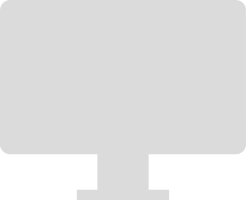

In [38]:
wordcloud = (  
    WordCloud(init_opts=opts.InitOpts(height='900px',width='1600px'))  
    .add("", all_skill_tuple, word_size_range=[10, 40], mask_image='电脑.png')
    .set_global_opts(title_opts=opts.TitleOpts(title="技能词云图"))  
)  
  
wordcloud.render("技能词云图.html")
wordcloud.render_notebook()

# 相关分析

In [32]:
# 查看学历要求情况
data['学历要求'].unique()

['本科', '中专/中技', '大专', '硕士', '学历不限', '博士', '高中', NaN, '初中及以下']
Categories (8, object): ['中专/中技', '初中及以下', '博士', '大专', '学历不限', '本科', '硕士', '高中']

In [33]:
# 学历要求转换为数值型
custom_order = ['学历不限', '初中及以下', '高中','中专/中技', '大专', '本科', '硕士', '博士']
custom_dtype = pd.api.types.CategoricalDtype(categories=custom_order, ordered=True)
data['学历要求'] = data['学历要求'].astype(custom_dtype).cat.codes
data['学历要求'].value_counts()

学历要求
 5    1631
 4     396
 0     156
 6     128
 2      34
 3      24
 7      16
-1      11
 1       3
Name: count, dtype: int64

In [34]:
# 查看工作经验情况
data['工作经验'].unique()

['3-5年', '经验不限', '1年以内', '5-10年', '1-3年', NaN, '在校/应届', '10年以上']
Categories (7, object): ['1-3年', '10年以上', '1年以内', '3-5年', '5-10年', '在校/应届', '经验不限']

In [35]:
# 工作经验转换为数值型
experience_order = ['在校/应届', '1年以内','1-3年', '3-5年', '5-10年', '10年以上']
experience_dtype = pd.api.types.CategoricalDtype(categories=experience_order, ordered=True)
data['工作经验'] = data['工作经验'].astype(experience_dtype).cat.codes
data['工作经验'].value_counts()

工作经验
 3    729
 2    587
-1    535
 4    402
 1     62
 0     44
 5     40
Name: count, dtype: int64

In [36]:
# 查看公司规模情况
data['公司规模'].unique()

['20-99人', '1000-9999人', '100-499人', '10000人以上', '0-20人', NaN, '500-999人']
Categories (6, object): ['0-20人', '100-499人', '1000-9999人', '10000人以上', '20-99人', '500-999人']

In [37]:
# 公司规模转换为数值型
scale_order = ['0-20人', '20-99人', '100-499人', '500-999人', '1000-9999人', '10000人以上']
scale_dtype = pd.api.types.CategoricalDtype(categories=scale_order, ordered=True)
data['公司规模'] = data['公司规模'].astype(scale_dtype).cat.codes
data['公司规模'].value_counts()

公司规模
 1    684
 2    492
 5    367
 4    350
 0    325
 3    169
-1     12
Name: count, dtype: int64

In [38]:
# 描述性统计
data.describe()

,年薪下限,年薪上限,工作经验,学历要求,公司规模,年薪下限_万,年薪上限_万
count,2.399000e+03,2.399000e+03,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000
mean,1.127706e+06,1.867852e+06,1.957482,4.481451,2.250104,112.770571,186.785223
std,1.930650e+06,3.202480e+06,1.797234,1.398338,1.685677,193.065044,320.248035
min,1.000000e+04,1.500000e+04,-1.000000,-1.000000,-1.000000,1.000000,1.500000
25%,8.400000e+04,1.200000e+05,1.000000,4.000000,1.000000,8.400000,12.000000
50%,1.800000e+05,2.640000e+05,2.000000,5.000000,2.000000,18.000000,26.400000
75%,1.560000e+06,2.340000e+06,3.000000,5.000000,4.000000,156.000000,234.000000
max,1.800000e+07,3.240000e+07,5.000000,7.000000,5.000000,1800.000000,3240.000000


In [39]:
data2=data.copy()

In [40]:
# 数量计算
data2['福利待遇数量']=data2['福利待遇'].apply(lambda x: len(x.split('，')) if x != '无' else 0)
data2['技能要求数量']=data2['技能要求'].apply(lambda x: len(x.split(',')) if x != '无' else 0)
data2

,职位类型,职位名称,年薪下限,年薪上限,福利待遇,技能要求,工作经验,学历要求,最少实习天数,最少实习周期,工作城市,工作地点,公司名称,公司行业,公司规模,招聘人职务,年薪下限_万,年薪上限_万,福利待遇数量,技能要求数量
0,数据分析师,数据分析师,2340000,3900000,无,"不限,数据分析/挖掘经验,机器学习建模经验,,,,",3,5,NaN,NaN,北京,东城区朝阳门,博数智源,计算机软件,1,人力资源部,234.0,390.0,0,7
1,数据分析师,数据录入（可接受实习生）,840000,1176000,定期体检，节日福利，零食下午茶，股票期权，交通补助，免费班车，包吃，带薪年假，五险一金，年终奖,"计算机相关专业,经济/工商管理相关专业,",-1,5,NaN,NaN,杭州,余杭区五常,同花顺,互联网,4,HR,84.0,117.6,10,3
2,数据分析师,数据分析师,300000,600000,无,"SQL,数据分析,Python,地图导航,数据挖掘",3,5,NaN,NaN,北京,昌平区南邵,阿里-高德,互联网,4,高级工程师,30.0,60.0,0,5
3,数据分析师,办公室文员,24000,84000,无,认真负责,-1,3,NaN,NaN,佳木斯,向阳区大润发,星念科技有限公司,大数据,1,招聘者,2.4,8.4,0,1
4,数据分析师,电商数据专员,60000,72000,团建聚餐，生日福利，保底工资，年终奖，工龄奖，零食下午茶，全勤奖，节日福利，绩效奖金,"数据分析/挖掘经验,电商/零售行业数据相关经验",1,4,NaN,NaN,厦门,湖里区殿前,衫多多,电子商务,2,HR,6.0,7.2,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,数据采集,python数据开发岗位（天津）,1560000,2340000,通讯补贴，年终奖，交通补助，生日福利，五险一金，工龄奖，团建聚餐，体检，节日福利，定期体检，...,"爬虫工程师,数据处理经验,熟悉Linux环境,计算机相关专业,,",-1,5,NaN,NaN,天津,西青区中北,谷川联行,互联网,3,HR,156.0,234.0,14,6
2395,数据采集,互联网数据文员,36000,60000,五险，加班补助，员工旅游，节日福利，免费班车，餐补，带薪年假,地图数据采集工程师,-1,4,NaN,NaN,阜阳,颍州区阜阳合肥现代产业园区,美图信息,计算机软件,3,人事,3.6,6.0,7,1
2396,数据采集,配件数据经理,2016000,3360000,交通补助，带薪年假，意外险，全勤奖，年终奖，底薪加提成，定期体检，员工旅游，团建聚餐，加班补...,配件，数据，汽车,-1,4,NaN,NaN,南京,建邺区奥体,F6汽车科技,互联网,2,总监,201.6,336.0,14,1
2397,数据采集,数据采集员,48000,60000,带薪年假，节日福利，五险一金，年终奖,"数据分析,数据仓库,数据挖掘,算法基础,计算机软件,",2,5,NaN,NaN,咸阳,渭城区西安咸阳国际机场,指尖教育,学术/科研,1,财务,4.8,6.0,4,6


In [41]:
# 读取城市等级
with open('城市划分.txt',encoding='utf-8') as f:
    urban_division=f.read()
urban_division=urban_division.split('\n')
city_dict={}
for i in range(len(urban_division)):
    city=urban_division[i].split('：')
    city[1]=city[1].split('、')
    city_dict[i+1]=city[1]
city_dict

{1: ['北京', '上海', '广州', '深圳'],
 2: ['天津',
  '石家庄',
  '太原',
  '呼和浩特',
  '沈阳',
  '大连',
  '长春',
  '哈尔滨',
  '南京',
  '杭州',
  '宁波',
  '合肥',
  '福州',
  '厦门',
  '南昌',
  '济南',
  '青岛',
  '郑州',
  '武汉',
  '长沙',
  '南宁',
  '海口',
  '重庆',
  '成都',
  '贵阳',
  '昆明',
  '西安',
  '兰州',
  '西宁',
  '银川',
  '乌鲁木齐'],
 3: ['唐山',
  '秦皇岛',
  '包头',
  '丹东',
  '锦州',
  '吉林',
  '牡丹江',
  '无锡',
  '徐州',
  '扬州',
  '温州',
  '金华',
  '蚌埠',
  '安庆',
  '泉州',
  '九江',
  '赣州',
  '烟台',
  '济宁',
  '洛阳',
  '平顶山',
  '宜昌',
  '襄阳',
  '岳阳',
  '常德',
  '韶关',
  '湛江',
  '惠州',
  '桂林',
  '北海',
  '三亚',
  '泸州',
  '南充',
  '遵义',
  '大理']}

In [42]:
# 城市等级划分
data2['城市等级'] = data2['工作城市'].apply(lambda x: next((key for key, value in city_dict.items() if x in value), 4))

In [43]:
# 职位类型转换为数值型
data2['职位类型2']=data2['职位类型'].astype('category').cat.codes

In [44]:
# 描述性统计
data2.describe()

,年薪下限,年薪上限,工作经验,学历要求,公司规模,年薪下限_万,年薪上限_万,福利待遇数量,技能要求数量,城市等级,职位类型2
count,2.399000e+03,2.399000e+03,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000
mean,1.127706e+06,1.867852e+06,1.957482,4.481451,2.250104,112.770571,186.785223,7.433931,3.764068,1.797832,3.499375
std,1.930650e+06,3.202480e+06,1.797234,1.398338,1.685677,193.065044,320.248035,5.356797,2.286092,0.947088,2.292038
min,1.000000e+04,1.500000e+04,-1.000000,-1.000000,-1.000000,1.000000,1.500000,0.000000,0.000000,1.000000,0.000000
25%,8.400000e+04,1.200000e+05,1.000000,4.000000,1.000000,8.400000,12.000000,3.000000,2.000000,1.000000,1.500000
50%,1.800000e+05,2.640000e+05,2.000000,5.000000,2.000000,18.000000,26.400000,7.000000,3.000000,2.000000,3.000000
75%,1.560000e+06,2.340000e+06,3.000000,5.000000,4.000000,156.000000,234.000000,11.000000,5.000000,2.000000,5.500000
max,1.800000e+07,3.240000e+07,5.000000,7.000000,5.000000,1800.000000,3240.000000,26.000000,13.000000,4.000000,7.000000


In [45]:
# 相关系数
data2[['年薪上限','年薪下限','工作经验', '学历要求', '公司规模', '福利待遇数量', '技能要求数量', '城市等级', '职位类型2']].corr()

,年薪上限,年薪下限,工作经验,学历要求,公司规模,福利待遇数量,技能要求数量,城市等级,职位类型2
年薪上限,1.000000,0.982930,0.242111,0.182332,0.389889,0.249212,0.137680,-0.236237,-0.053320
年薪下限,0.982930,1.000000,0.260194,0.186030,0.377478,0.243704,0.131550,-0.227598,-0.045830
工作经验,0.242111,0.260194,1.000000,0.339850,0.182592,0.096085,0.172335,-0.187818,-0.013977
学历要求,0.182332,0.186030,0.339850,1.000000,0.224705,0.155814,0.213743,-0.246079,-0.203726
公司规模,0.389889,0.377478,0.182592,0.224705,1.000000,0.465404,0.136193,-0.161609,-0.206112
福利待遇数量,0.249212,0.243704,0.096085,0.155814,0.465404,1.000000,0.137832,-0.051253,-0.082359
技能要求数量,0.137680,0.131550,0.172335,0.213743,0.136193,0.137832,1.000000,-0.142802,-0.099351
城市等级,-0.236237,-0.227598,-0.187818,-0.246079,-0.161609,-0.051253,-0.142802,1.000000,0.036730
职位类型2,-0.053320,-0.045830,-0.013977,-0.203726,-0.206112,-0.082359,-0.099351,0.036730,1.000000


In [46]:
data2.to_excel('data2.xlsx', index=False)

# 线性回归

In [3]:
import pandas as pd
import statsmodels.api as sm

In [4]:
data2=pd.read_excel('data2.xlsx')

In [7]:
X = data2[['工作经验', '学历要求', '公司规模', '福利待遇数量', '技能要求数量', '城市等级','职位类型2']]
y = data2['年薪上限']

In [50]:
# 逐步回归
def stepwise_regression(X, y, p=0.05):
    in_var = []
    while True:
        flag = True
        out_var = list(set(X.columns) - set(in_var))
        updated_p = pd.Series(index=out_var)
        for var in out_var:
            X0 = sm.add_constant(X[in_var + [var]])
            model0 = sm.OLS(y, X0).fit()
            updated_p[var] = model0.pvalues[var]
        min_p = updated_p.min()
        if min_p < p:
            min_var = updated_p.argmin()
            min_var = updated_p.keys().to_list()[min_var]
            in_var.append(min_var)
            flag = False
            print(f'变量：{min_var}，p值：{min_p:.3f}')
        if flag:
            break
    return in_var


var=stepwise_regression(X, y)
print(var)

变量：公司规模，p值：0.000
变量：城市等级，p值：0.000
变量：工作经验，p值：0.000
变量：福利待遇数量，p值：0.000
变量：技能要求数量，p值：0.036
['公司规模', '城市等级', '工作经验', '福利待遇数量', '技能要求数量']


In [51]:
# 带常量的线性回归
X2 = data2[['工作经验', '公司规模', '福利待遇数量', '技能要求数量', '城市等级']]
X2=sm.add_constant(X2)
y2 = data2['年薪上限']
model1=sm.OLS(y2, X2).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   年薪上限   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     128.9
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          3.79e-121
Time:                        16:02:23   Log-Likelihood:                -39053.
No. Observations:                2399   AIC:                         7.812e+04
Df Residuals:                    2393   BIC:                         7.815e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.407e+05      2e+05      2.201      0.0

In [52]:
# 不带常量的线性回归
X3 = data2[['工作经验', '公司规模', '福利待遇数量', '技能要求数量', '城市等级']]
y3 = data2['年薪上限']
model2=sm.OLS(y3, X3).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   年薪上限   R-squared (uncentered):                   0.411
Model:                            OLS   Adj. R-squared (uncentered):              0.410
Method:                 Least Squares   F-statistic:                              334.1
Date:                Sun, 09 Jun 2024   Prob (F-statistic):                   5.46e-272
Time:                        16:02:23   Log-Likelihood:                         -39056.
No. Observations:                2399   AIC:                                  7.812e+04
Df Residuals:                    2394   BIC:                                  7.815e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [53]:
# 画图展示
def plot_fit_lines(X, y, cols_to_plot):  
    fig, axs = plt.subplots(nrows=len(cols_to_plot), figsize=(10, 10), sharex=True)  
    for i, col in enumerate(cols_to_plot):  
        sns.regplot(x=X[col], y=y, data=pd.concat([X[[col]], y], axis=1), scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=axs[i])  
        axs[i].set_xlabel(col)  
        axs[i].set_ylabel('年薪上限')  
        axs[i].set_title(f'{col}与年薪上限')  
    plt.tight_layout()  
    plt.show()  

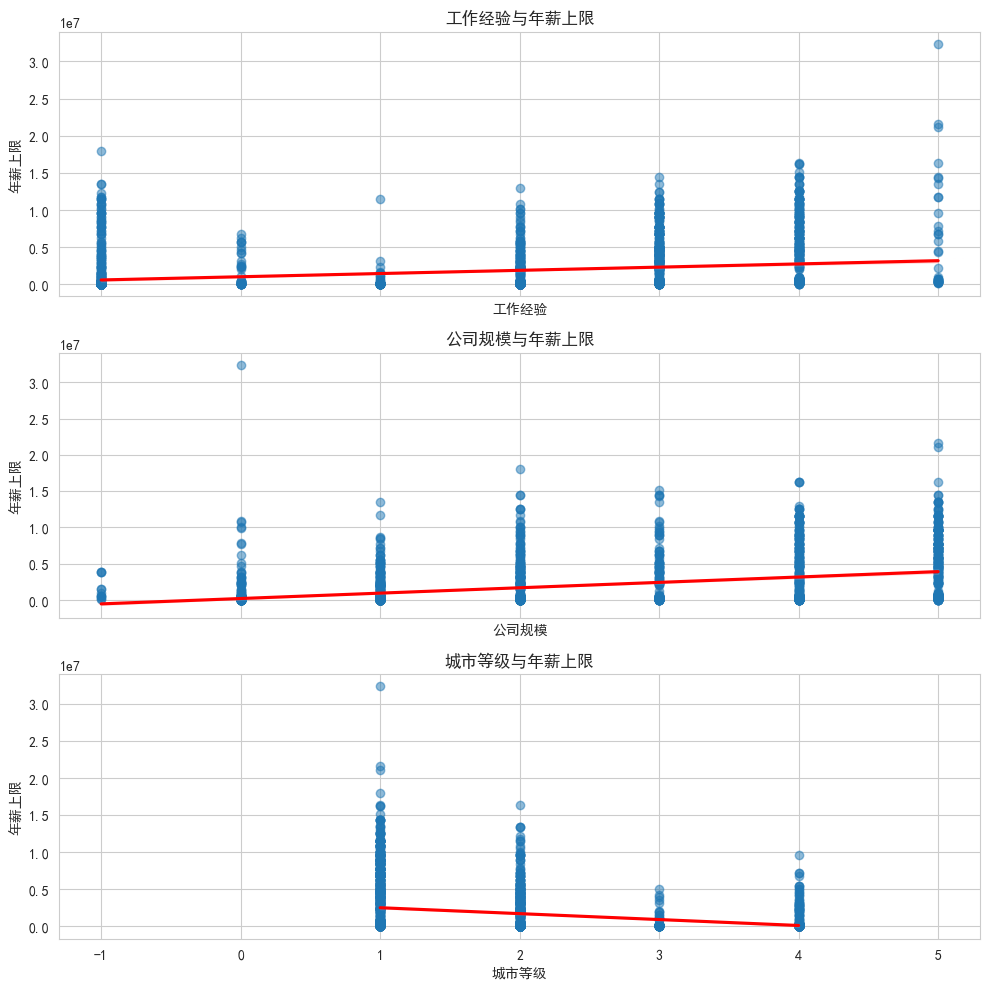

In [54]:
cols_to_plot = ['工作经验', '公司规模', '城市等级']  
plot_fit_lines(X3, y3, cols_to_plot)

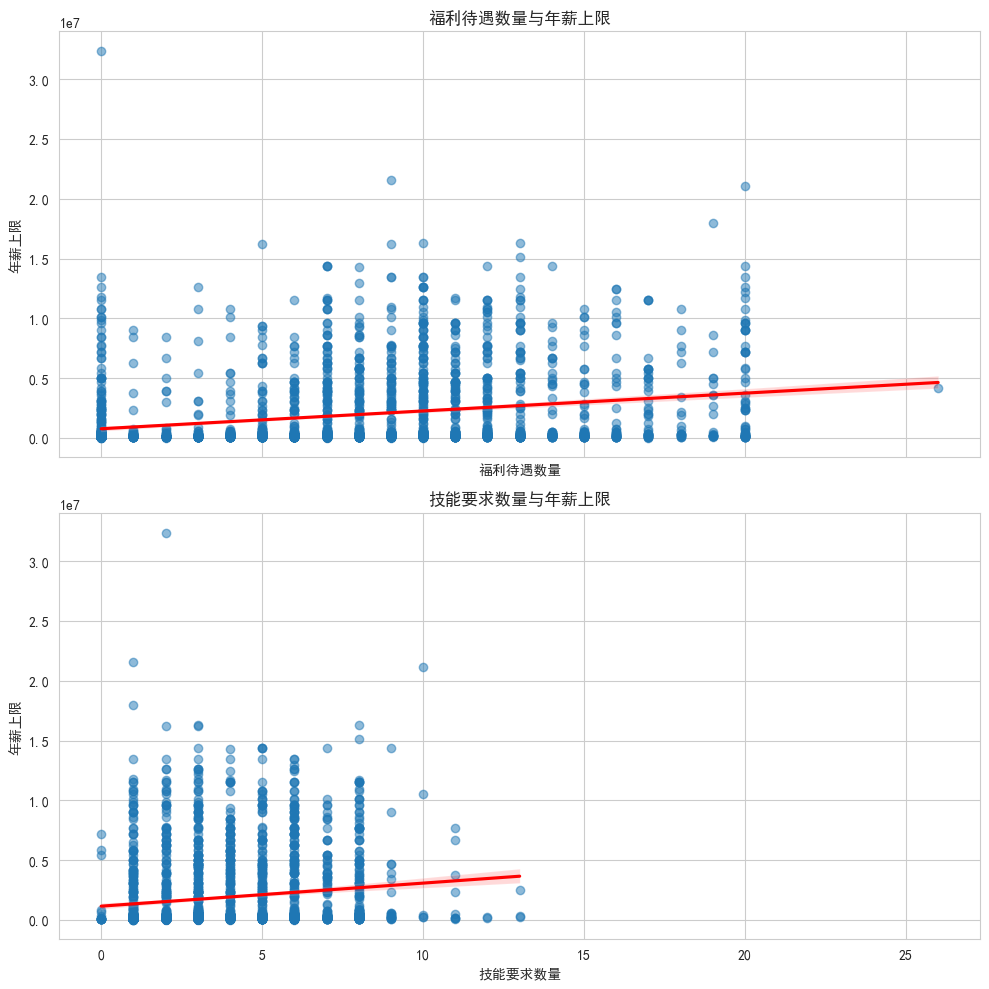

In [55]:
cols_to_plot = ['福利待遇数量', '技能要求数量']  
plot_fit_lines(X3, y3, cols_to_plot) 

# 分类模型

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# 技能列划分
def preprocess_text(text):
    skills = ''.join([char for char in text if char.isalnum() or char == ','])
    skills = skills.split(',')
    skills = [skill for skill in skills if skill and skill != '不限']
    return skills
data2['技能列表'] = data2['技能要求'].apply(preprocess_text)
data2

,职位类型,职位名称,年薪下限,年薪上限,福利待遇,技能要求,工作经验,学历要求,最少实习天数,最少实习周期,...,公司行业,公司规模,招聘人职务,年薪下限_万,年薪上限_万,福利待遇数量,技能要求数量,城市等级,职位类型2,技能列表
0,数据分析师,数据分析师,2340000,3900000,无,"不限,数据分析/挖掘经验,机器学习建模经验,,,,",3,5,NaN,NaN,...,计算机软件,1,人力资源部,234.0,390.0,0,7,1,2,"[数据分析挖掘经验, 机器学习建模经验]"
1,数据分析师,数据录入（可接受实习生）,840000,1176000,定期体检，节日福利，零食下午茶，股票期权，交通补助，免费班车，包吃，带薪年假，五险一金，年终奖,"计算机相关专业,经济/工商管理相关专业,",-1,5,NaN,NaN,...,互联网,4,HR,84.0,117.6,10,3,2,2,"[计算机相关专业, 经济工商管理相关专业]"
2,数据分析师,数据分析师,300000,600000,无,"SQL,数据分析,Python,地图导航,数据挖掘",3,5,NaN,NaN,...,互联网,4,高级工程师,30.0,60.0,0,5,1,2,"[SQL, 数据分析, Python, 地图导航, 数据挖掘]"
3,数据分析师,办公室文员,24000,84000,无,认真负责,-1,3,NaN,NaN,...,大数据,1,招聘者,2.4,8.4,0,1,4,2,[认真负责]
4,数据分析师,电商数据专员,60000,72000,团建聚餐，生日福利，保底工资，年终奖，工龄奖，零食下午茶，全勤奖，节日福利，绩效奖金,"数据分析/挖掘经验,电商/零售行业数据相关经验",1,4,NaN,NaN,...,电子商务,2,HR,6.0,7.2,9,2,2,2,"[数据分析挖掘经验, 电商零售行业数据相关经验]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,数据采集,python数据开发岗位（天津）,1560000,2340000,通讯补贴，年终奖，交通补助，生日福利，五险一金，工龄奖，团建聚餐，体检，节日福利，定期体检，...,"爬虫工程师,数据处理经验,熟悉Linux环境,计算机相关专业,,",-1,5,NaN,NaN,...,互联网,3,HR,156.0,234.0,14,6,2,6,"[爬虫工程师, 数据处理经验, 熟悉Linux环境, 计算机相关专业]"
2395,数据采集,互联网数据文员,36000,60000,五险，加班补助，员工旅游，节日福利，免费班车，餐补，带薪年假,地图数据采集工程师,-1,4,NaN,NaN,...,计算机软件,3,人事,3.6,6.0,7,1,4,6,[地图数据采集工程师]
2396,数据采集,配件数据经理,2016000,3360000,交通补助，带薪年假，意外险，全勤奖，年终奖，底薪加提成，定期体检，员工旅游，团建聚餐，加班补...,配件，数据，汽车,-1,4,NaN,NaN,...,互联网,2,总监,201.6,336.0,14,1,2,6,[配件数据汽车]
2397,数据采集,数据采集员,48000,60000,带薪年假，节日福利，五险一金，年终奖,"数据分析,数据仓库,数据挖掘,算法基础,计算机软件,",2,5,NaN,NaN,...,学术/科研,1,财务,4.8,6.0,4,6,4,6,"[数据分析, 数据仓库, 数据挖掘, 算法基础, 计算机软件]"


In [10]:
# 向量转化
vectorizer = CountVectorizer()
skills_matrix = vectorizer.fit_transform(data2['技能列表'].apply(lambda x: ' '.join(x)))
skills_df = pd.DataFrame(skills_matrix.toarray(), columns=vectorizer.get_feature_names_out())
skills_df

,1104,2020应届生,8d,985211优先,985或211,abap,abap开发,acquiredata,adas,adf,...,颗粒物,风控,风控相关经验,风控策略模型,风险模型,驻场,高精度地图,高级爬虫工程师,高级电气工程师,高级软件工程师
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# 合并
skills_count = skills_df.groupby(data2['职位类型']).sum()
skills_count

,1104,2020应届生,8d,985211优先,985或211,abap,abap开发,acquiredata,adas,adf,...,颗粒物,风控,风控相关经验,风控策略模型,风险模型,驻场,高精度地图,高级爬虫工程师,高级电气工程师,高级软件工程师
职位类型,,,,,,,,,,,,,,,,,,,,,
ETL工程师,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
数据仓库,0,0,0,0,0,0,0,1,0,0,...,0,1,5,1,1,0,0,0,0,0
数据分析师,1,0,1,0,0,0,0,0,0,0,...,1,1,2,0,0,1,0,0,0,0
数据开发,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
数据挖掘,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
数据架构师,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
数据采集,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
爬虫工程师,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [12]:
# 每个职位要求做多的的前十个技能
def get_top_skills(skills_count, n=10):
    top_skills = {}
    for job_type, row in skills_count.iterrows():
        top_indices = row.argsort()[-n:][::-1]
        top_skills[job_type] = list(skills_count.columns[top_indices])
    return top_skills

top_10_skills = get_top_skills(skills_count)
top_10_skills

{'ETL工程师': ['大数据开发经验',
  'sql',
  'java',
  '计算机相关专业',
  'spark',
  'python',
  'flink',
  'hive',
  '数仓建设经验',
  'hadoop'],
 '数据仓库': ['python',
  '计算机相关专业',
  'sql',
  '大数据处理经验',
  'java',
  'spark',
  '数据挖掘',
  '深度学习算法',
  '数学统计相关专业',
  '机器学习算法'],
 '数据分析师': ['sql',
  'python',
  '数学统计相关专业',
  '数据分析挖掘经验',
  '计算机相关专业',
  '数据分析',
  'spss',
  'excel',
  'powerbi',
  'tableau'],
 '数据开发': ['sql',
  'mysqloracledb2',
  'python',
  'oracle',
  'etl',
  'etl设计开发经验',
  'hive',
  'shell',
  'mysql',
  'spark'],
 '数据挖掘': ['sql',
  'hive',
  'spark',
  '数仓设计开发经验',
  'java',
  '计算机相关专业',
  'python',
  '数据仓库',
  '大数据开发经验',
  'hadoop'],
 '数据架构师': ['大数据平台架构经验',
  'spark',
  'java',
  'sql',
  '大数据处理经验',
  'hadoop',
  'python',
  'hive',
  '计算机相关专业',
  'kafka'],
 '数据采集': ['数据采集',
  'python',
  '地图数据采集工程师',
  '爬虫工程师',
  'java',
  '数据分析',
  '接受兼职',
  '数据挖掘',
  '数据仓库',
  '爬虫开发经验'],
 '爬虫工程师': ['python',
  '爬虫',
  '网络爬虫技术',
  'scrapy',
  '爬虫经验',
  'java',
  '分布式技术',
  'mysql',
  '爬虫工程师',
  '计算机相关专业']}

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,auc

In [14]:
# 职位技能拼接
data2['职位技能'] = data2['职位类型'].astype(str) + ' ' + data2['技能列表'].apply(lambda x: ' '.join(x))
data2

,职位类型,职位名称,年薪下限,年薪上限,福利待遇,技能要求,工作经验,学历要求,最少实习天数,最少实习周期,...,公司规模,招聘人职务,年薪下限_万,年薪上限_万,福利待遇数量,技能要求数量,城市等级,职位类型2,技能列表,职位技能
0,数据分析师,数据分析师,2340000,3900000,无,"不限,数据分析/挖掘经验,机器学习建模经验,,,,",3,5,NaN,NaN,...,1,人力资源部,234.0,390.0,0,7,1,2,"[数据分析挖掘经验, 机器学习建模经验]",数据分析师 数据分析挖掘经验 机器学习建模经验
1,数据分析师,数据录入（可接受实习生）,840000,1176000,定期体检，节日福利，零食下午茶，股票期权，交通补助，免费班车，包吃，带薪年假，五险一金，年终奖,"计算机相关专业,经济/工商管理相关专业,",-1,5,NaN,NaN,...,4,HR,84.0,117.6,10,3,2,2,"[计算机相关专业, 经济工商管理相关专业]",数据分析师 计算机相关专业 经济工商管理相关专业
2,数据分析师,数据分析师,300000,600000,无,"SQL,数据分析,Python,地图导航,数据挖掘",3,5,NaN,NaN,...,4,高级工程师,30.0,60.0,0,5,1,2,"[SQL, 数据分析, Python, 地图导航, 数据挖掘]",数据分析师 SQL 数据分析 Python 地图导航 数据挖掘
3,数据分析师,办公室文员,24000,84000,无,认真负责,-1,3,NaN,NaN,...,1,招聘者,2.4,8.4,0,1,4,2,[认真负责],数据分析师 认真负责
4,数据分析师,电商数据专员,60000,72000,团建聚餐，生日福利，保底工资，年终奖，工龄奖，零食下午茶，全勤奖，节日福利，绩效奖金,"数据分析/挖掘经验,电商/零售行业数据相关经验",1,4,NaN,NaN,...,2,HR,6.0,7.2,9,2,2,2,"[数据分析挖掘经验, 电商零售行业数据相关经验]",数据分析师 数据分析挖掘经验 电商零售行业数据相关经验
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,数据采集,python数据开发岗位（天津）,1560000,2340000,通讯补贴，年终奖，交通补助，生日福利，五险一金，工龄奖，团建聚餐，体检，节日福利，定期体检，...,"爬虫工程师,数据处理经验,熟悉Linux环境,计算机相关专业,,",-1,5,NaN,NaN,...,3,HR,156.0,234.0,14,6,2,6,"[爬虫工程师, 数据处理经验, 熟悉Linux环境, 计算机相关专业]",数据采集 爬虫工程师 数据处理经验 熟悉Linux环境 计算机相关专业
2395,数据采集,互联网数据文员,36000,60000,五险，加班补助，员工旅游，节日福利，免费班车，餐补，带薪年假,地图数据采集工程师,-1,4,NaN,NaN,...,3,人事,3.6,6.0,7,1,4,6,[地图数据采集工程师],数据采集 地图数据采集工程师
2396,数据采集,配件数据经理,2016000,3360000,交通补助，带薪年假，意外险，全勤奖，年终奖，底薪加提成，定期体检，员工旅游，团建聚餐，加班补...,配件，数据，汽车,-1,4,NaN,NaN,...,2,总监,201.6,336.0,14,1,2,6,[配件数据汽车],数据采集 配件数据汽车
2397,数据采集,数据采集员,48000,60000,带薪年假，节日福利，五险一金，年终奖,"数据分析,数据仓库,数据挖掘,算法基础,计算机软件,",2,5,NaN,NaN,...,1,财务,4.8,6.0,4,6,4,6,"[数据分析, 数据仓库, 数据挖掘, 算法基础, 计算机软件]",数据采集 数据分析 数据仓库 数据挖掘 算法基础 计算机软件


In [15]:
# tf—idf转换
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data2['职位技能'])
y = data2['职位类型']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 查看数据情况
df_tfidf = pd.DataFrame(X.todense(), columns=tfidf_vectorizer.get_feature_names_out())
skill_list=df_tfidf.columns.to_list()
skill_list

['1104',
 '2020应届生',
 '8d',
 '985211优先',
 '985或211',
 'abap',
 'abap开发',
 'acquiredata',
 'adas',
 'adf',
 'ai',
 'alteryx',
 'ambari',
 'android',
 'apify',
 'appium',
 'app逆向',
 'arcgis',
 'arcgisqgis',
 'awsexperienceplus',
 'azkaban',
 'azure',
 'azureadf',
 'bacnet',
 'beautifulsoup',
 'bi',
 'biee',
 'bi开发',
 'bi数据可视化的经验',
 'bi数据开发',
 'bi项目开发经验',
 'bo',
 'bw',
 'bw4hana',
 'bwquery',
 'cad',
 'cc',
 'ccc',
 'cctv',
 'cdga',
 'cdisc',
 'cdmp',
 'cdp',
 'cdr',
 'ce',
 'celerydocker',
 'charles',
 'clickhouse',
 'cloud',
 'cobol',
 'controlm',
 'css',
 'c语言',
 'dama',
 'database',
 'databricks',
 'datastage',
 'dataworks',
 'datax',
 'dax',
 'dax函数',
 'db2',
 'dba',
 'dcmm',
 'dfs',
 'django',
 'doris',
 'druid',
 'eam',
 'echarts',
 'elasticsearch',
 'epscass',
 'erc20',
 'erp',
 'erp系统',
 'es',
 'esg',
 'etl',
 'etl工程师',
 'etl开发经验',
 'etl设计开发经验',
 'excel',
 'fa',
 'feapder天眼查',
 'ffmpeg',
 'fiddler',
 'finder',
 'finebi',
 'finereport',
 'finereport帆软',
 'flask',
 'flink',
 'flume

### 支持向量机

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
# 第一次超参调优

param_svm1 = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001,0.01, 0.1, 1, 'scale', 'auto']
}

grid_svm1 = GridSearchCV(SVC(), param_svm1, cv=5, verbose=2, n_jobs=-1)
grid_svm1.fit(X_train, y_train)
best_svm_clf1 = grid_svm1.best_estimator_   
best_svm_clf1

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
# 第二次超参调优
param_svm2 = {
    'C': [0.5,0.7, 1, 3, 5],
    'gamma': [0.05,0.007,0.1,0.3,0.5,]
}

grid_svm2 = GridSearchCV(SVC(), param_svm2, cv=5, verbose=2, n_jobs=-1)
grid_svm2.fit(X_train, y_train)
best_svm_clf2 = grid_svm2.best_estimator_   
best_svm_clf2

In [17]:
# 模型训练
svm_clf = SVC(C=0.5,gamma=0.3, random_state=123)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'SVM分类器准确率：{svm_accuracy:.4f}')

SVM分类器准确率：0.9812


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [23]:
job_list=data2['职位类型'].unique().tolist()

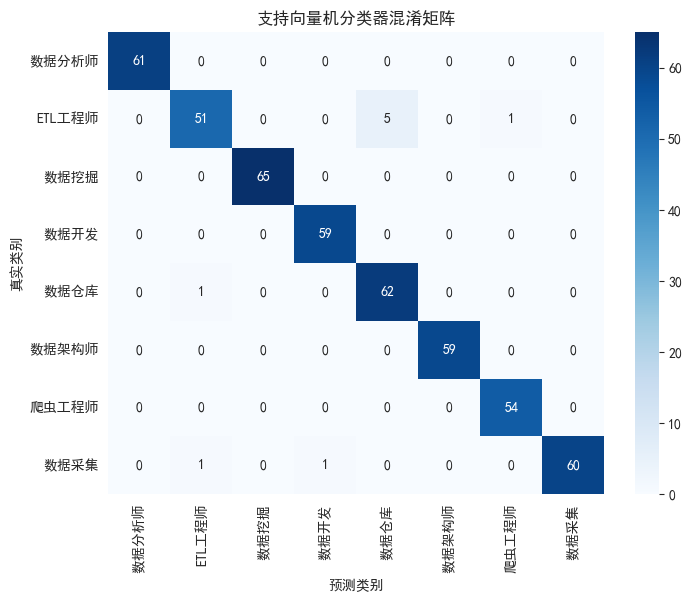

In [26]:
# 计算混淆矩阵
conf_mat = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=job_list, yticklabels=job_list)
plt.xlabel('预测类别')
plt.ylabel('真实类别')

plt.title('支持向量机分类器混淆矩阵')
plt.show()

### 随机森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 第一次超参调优
param_rfc1 = {
   'n_estimators': [10, 100, 200],
   'max_depth': [None, 10, 50, 100],
   'min_samples_split': [5, 10, 50, 100],
   'min_samples_leaf': [1, 2, 4, 10],
   'max_features': ['auto', 'sqrt', 'log2'],
   'bootstrap': [True, False]
}

random_rfc1 = GridSearchCV(RandomForestClassifier(), param_rfc1, cv=5, verbose=2,n_jobs=-1)
random_rfc1.fit(X_train, y_train)
best_rfc1 = random_rfc1.best_estimator_
best_rfc1

In [ ]:
# 第二次超参调优
param_rfc2 = {
   'n_estimators': [200,300,500,600],
   'max_depth': [30,40,50,60,70,80],
   'min_samples_split': [100, 200, 500]
}

random_rfc2 = GridSearchCV(RandomForestClassifier(), param_rfc2, cv=5, verbose=2, n_jobs=-1)
random_rfc2.fit(X_train, y_train)
best_rfc2 = random_rfc2.best_estimator_
best_rfc2

In [ ]:
# 模型训练
rf_clf = RandomForestClassifier(n_estimators=300,min_samples_split=100,max_depth=30, random_state=123)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'随机森林分类器准确率：{rf_accuracy:.4f}')

In [ ]:
# 计算混淆矩阵
conf_mat = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=job_list, yticklabels=job_list)
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.title('随机森林分类器混淆矩阵')
plt.show()

### 决策树

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 第一次超参调优
param_dtc1 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,1, 5, 10, 20],
    'min_samples_split': [2, 5, 10,50],
    'min_samples_leaf': [1, 2, 5, 10],
}

grid_dtc1 = GridSearchCV(DecisionTreeClassifier(), param_dtc1, cv=5, scoring='accuracy',verbose=2, n_jobs=-1)
grid_dtc1.fit(X_train, y_train)
best_dtc1 = grid_dtc1.best_estimator_
best_dtc1

In [ ]:
# 第二次超参调优
param_dtc2 = {
    'max_depth': [20,50,100,200],
    'min_samples_leaf': [3, 5,7],
}
grid_dtc2 = GridSearchCV(DecisionTreeClassifier(), param_dtc2, cv=5, scoring='accuracy',verbose=2, n_jobs=-1)
grid_dtc2.fit(X_train, y_train)
best_dtc2 = grid_dtc2.best_estimator_
best_dtc2

In [ ]:
# 决策树
dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=5,random_state=123)
dt_clf.fit(X_train,y_train)
y_pred_dt = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'决策树分类器准确率：{dt_accuracy:.4f}')

In [ ]:
# 计算混淆矩阵
conf_mat = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=job_list, yticklabels=job_list)
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.title('决策树分类器混淆矩阵')
plt.show()

### 朴素贝叶斯

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# 第一次超参调优
param_nb1 = {
    'alpha': [0.1, 0.5, 1.0, 5, 10,100,1000]
}

grid_nb1 = GridSearchCV(MultinomialNB(), param_nb1, cv=5,scoring='accuracy',verbose=2, n_jobs=-1)
grid_nb1.fit(X_train, y_train)
best_nb1 = grid_nb1.best_estimator_
best_nb1

In [ ]:
# 第二次超参调优
param_nb2 = {
    'alpha': [50,70,100,150,200,300,400,500]
}

grid_nb2 = GridSearchCV(MultinomialNB(), param_nb2, cv=5,scoring='accuracy',verbose=2, n_jobs=-1)
grid_nb2.fit(X_train, y_train)
best_nb2 = grid_nb2.best_estimator_
best_nb2

In [30]:
# 朴素贝叶斯
nb_clf=MultinomialNB(alpha=150)
nb_clf.fit(X_train,y_train)
y_pred_nb = nb_clf.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f'朴素贝叶斯分类器准确率：{nb_accuracy:.4f}')

朴素贝叶斯分类器准确率：0.9771


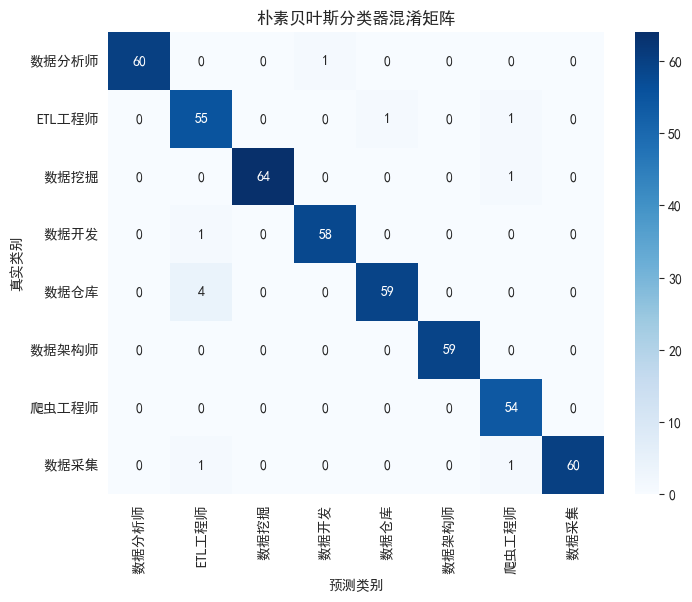

In [32]:
# 计算混淆矩阵
conf_mat = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=job_list, yticklabels=job_list)
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.title('朴素贝叶斯分类器混淆矩阵')
plt.show()

### 逻辑斯谛

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# 第一次超参调优
param_lg1 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'multi_class': ['ovr', 'multinomial']
}

grid_lg1 = GridSearchCV(LogisticRegression(), param_lg1, cv=5, scoring='accuracy',verbose=2, n_jobs=-1)
grid_lg1.fit(X_train, y_train)
best_lg1=grid_lg1.best_params_
best_lg1

In [ ]:
# 第二次超参调优
param_lg2 = {
    'C': [0.5, 0.7, 1, 3, 5,7],
}
grid_lg2 = GridSearchCV(LogisticRegression(), param_lg2, cv=5, scoring='accuracy',verbose=2, n_jobs=-1)
grid_lg2.fit(X_train, y_train)
best_lg2=grid_lg2.best_params_
best_lg2

In [ ]:
# 逻辑斯谛
lg_clf=LogisticRegression(C=5,multi_class='ovr',penalty='l2',solver='liblinear',random_state=123)
lg_clf.fit(X_train,y_train)
y_pred_lg = lg_clf.predict(X_test)
lg_accuracy = accuracy_score(y_test, y_pred_lg)
print(f'逻辑斯谛分类器准确率：{lg_accuracy:.4f}')

In [ ]:
# 计算混淆矩阵
conf_mat = confusion_matrix(y_test, y_pred_lg)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=job_list, yticklabels=job_list)
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.title('逻辑斯谛分类器混淆矩阵')
plt.show()

五个模型的准确率都在97%以上，均采纳

In [ ]:
import pickle
models=[svm_clf,rf_clf,dt_clf,nb_clf,lg_clf,tfidf_vectorizer]
# 保存模型
with open('models.pkl', 'wb') as file:
    pickle.dump(models, file)

In [ ]:
# 职位推荐
def predict_job(user_skills):
    skills_vector = tfidf_vectorizer.transform([user_skills])
    
    svm_pred = svm_clf.predict(skills_vector)
    rf_pred = rf_clf.predict(skills_vector)
    dt_pred = dt_clf.predict(skills_vector)
    nb_pred = nb_clf.predict(skills_vector)
    lg_pred = lg_clf.predict(skills_vector)
    predictions = {
        '支持向量机': svm_pred.item(),
        '随机森林': rf_pred.item(),
        '决策树': dt_pred.item(),
        '朴素贝叶斯': nb_pred.item(),
        '逻辑斯谛': lg_pred.item()
    }
    return predictions

In [ ]:
# 所有技能
skill_list

In [ ]:
predict_job("BI，python、SQL、数据分析、c++、java")